In [1]:
# import all neede libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# list over all csv-files and save its names to 'csv_data_list'
directory = 'e:/My/Projects/LAB/DC Reference Standard DTF 20125/Docs/csv/new_10V'
extension = '.csv'
csv_data_list = []
for filename in os.listdir(directory):
    if not filename.endswith(extension):
        continue
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        csv_data_list.append(f)

In [11]:
# Concantenate all small DataFrames into big 'df_all'
df_all = pd.DataFrame()
for f in csv_data_list:
    tmp = pd.read_csv(f, sep=';', names = ['Date', 'Time', 't0','t1','t2','t3','t4','t5','t6','t7','text','Uref','VAC'])
    tmp['DateTime'] = pd.to_datetime( tmp['Date'] + ' ' + tmp['Time'], dayfirst = True)
    df_all = pd.concat([df_all, tmp])
# Sort them by date and time
df_all.sort_values(by=['DateTime'], inplace=True, na_position='first')
# No original index, count them again
df_all.reset_index(inplace = True, drop=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192255 entries, 0 to 192254
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      192255 non-null  object        
 1   Time      192255 non-null  object        
 2   t0        192255 non-null  float64       
 3   t1        192255 non-null  float64       
 4   t2        192255 non-null  float64       
 5   t3        192255 non-null  float64       
 6   t4        192255 non-null  float64       
 7   t5        192255 non-null  float64       
 8   t6        192255 non-null  float64       
 9   t7        192255 non-null  float64       
 10  text      192255 non-null  float64       
 11  Uref      192255 non-null  object        
 12  VAC       192252 non-null  float64       
 13  DateTime  192255 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 20.5+ MB


In [4]:
# One bad value removing test
badUref = df_all[df_all.DateTime == '2023-10-11 00:57:50'].Uref
nanUref = pd.to_numeric(badUref, errors = 'coerce')
nanUref

169143   NaN
Name: Uref, dtype: float64

In [5]:
df_all.loc[:, 'Uref'] = df_all.Uref.apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
df_all[df_all.DateTime == '2023-10-11 00:57:50']

,Date,Time,t0,t1,t2,t3,t4,t5,t6,t7,text,Uref,VAC,DateTime
169143,11.10.2023,00:57:50,25.88,26.06,25.94,26.06,26.06,26.0,26.06,26.0,-1000.0,NaN,NaN,2023-10-11 00:57:50


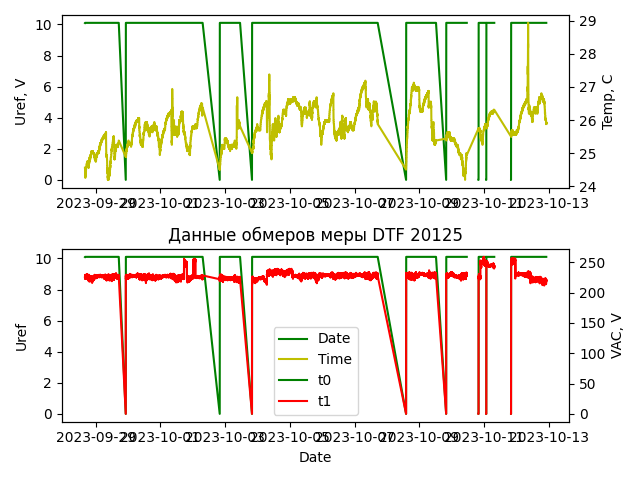

In [6]:
# Trying to plot all data in beauty-like view :-):-):-):-)
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.title('Данные обмеров меры DTF 20125')

ax1b=ax1.twinx()
plot1a, =ax1.plot(df_all.DateTime, df_all.Uref, color='g')
plot1b, = ax1b.plot(df_all.DateTime, df_all.t0, color='y')

ax1.set_ylabel('Uref, V')
ax1b.set_ylabel('Temp, C')

ax2b=ax2.twinx()
plot2a, = ax2.plot(df_all.DateTime, df_all.Uref, color='g')
plot2b, =ax2b.plot(df_all.DateTime, df_all.VAC, color='r')

ax2.set_xlabel('Date')
ax2.set_ylabel('Uref')
ax2b.set_ylabel('VAC, V')

plt.legend([plot1a, plot1b, plot2a, plot2b], df_all.columns)

plt.tight_layout()

In [10]:
# Take first five elements to test
df_all.head()

,Date,Time,t0,t1,t2,t3,t4,t5,t6,t7,text,Uref,VAC,DateTime
0,28.09.2023,16:00:18,24.56,24.63,24.75,24.63,24.5,24.50,24.56,24.56,-1000.0,10.094448,225.163,2023-09-28 16:00:18
1,28.09.2023,16:00:23,24.56,24.63,24.75,24.63,24.5,24.50,24.56,24.56,-1000.0,10.100579,224.355,2023-09-28 16:00:23
2,28.09.2023,16:00:28,24.56,24.63,24.75,24.63,24.5,24.44,24.56,24.56,-1000.0,10.101757,224.623,2023-09-28 16:00:28
3,28.09.2023,16:00:33,24.50,24.63,24.75,24.63,24.5,24.50,24.56,24.50,-1000.0,10.102504,224.670,2023-09-28 16:00:33
4,28.09.2023,16:00:38,24.56,24.63,24.75,24.63,24.5,24.50,24.56,24.56,-1000.0,10.103006,224.423,2023-09-28 16:00:38


In [9]:
# Take last five elements to check the date and time
df_all.tail()

,Date,Time,t0,t1,t2,t3,t4,t5,t6,t7,text,Uref,VAC,DateTime
192233,12.10.2023,22:10:54,25.88,26.06,26.0,26.31,26.06,26.06,26.44,26.19,-1000.0,10.104796,219.921,2023-10-12 22:10:54
192234,12.10.2023,22:10:59,25.88,26.06,26.0,26.31,26.06,26.06,26.44,26.19,-1000.0,10.104795,219.526,2023-10-12 22:10:59
192235,12.10.2023,22:11:04,25.88,26.06,26.0,26.31,26.06,26.06,26.44,26.19,-1000.0,10.104795,219.681,2023-10-12 22:11:04
192236,12.10.2023,22:11:09,25.88,26.06,26.0,26.31,26.06,26.06,26.44,26.19,-1000.0,10.104795,219.978,2023-10-12 22:11:09
192237,12.10.2023,22:11:14,25.88,26.06,26.0,26.31,26.06,26.06,26.44,26.19,-1000.0,10.104795,219.671,2023-10-12 22:11:14
